# Are train delays correlated to how bad the weather is?

### Note:
- DB-API only provides current data, meaning I can only access train data from the current day, I can't access past data, therefore, this experiment need to run continuously to be successful.  
- To get a successful experiment/results we should consider a full year's data to capture all seasons. Since now (06.2023) is summer, the weather isn't an issue, which can also helps, if there are many delays with a good weather, then it is due to another reason/s not from the weather, and this will be refactored from the whole year analysis. So an airflow dag will be able to capture all year's data. In ideal world, if we set a dag to get the DB-API data hourly (due to api system) and another dag to get weather data daily (average temperature per day), after a year worth of data we can run the exploration and the report to get the desired results.

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_sql("select * from weather_train_delay", "sqlite:///../data.sqlite").drop(['planned_next_stations', 'changed_next_stations', 'EVA_NR'], axis=1)
cols = ['date', 'Bundesland', 'train_station_name', 'weather_station_name', 'train_station_laenge',
       'train_station_breite', 'weather_station_laenge', 'weather_station_breite', 'temperature', 'delay',
        'planned_arrival', 'changed_arrival', 'planned_departure', 
       'changed_departure',  'arrival_difference', 'departure_difference',
       'arrival_difference_minuit', 'departure_difference_minuit', 
       ]
df = df[cols]
df

,date,Bundesland,train_station_name,weather_station_name,train_station_laenge,train_station_breite,weather_station_laenge,weather_station_breite,temperature,delay,planned_arrival,changed_arrival,planned_departure,changed_departure,arrival_difference,departure_difference,arrival_difference_minuit,departure_difference_minuit
0,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:10:00,2023-06-23 16:12:00,2023-06-23 16:10:00,2023-06-23 16:13:00,0 days 00:02:00,0 days 00:03:00,2.0,3.0
1,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:00:00,2023-06-23 16:05:00,2023-06-23 16:00:00,2023-06-23 16:05:00,0 days 00:05:00,0 days 00:05:00,5.0,5.0
2,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,0,2023-06-23 16:24:00,2023-06-23 16:25:00,2023-06-23 16:24:00,2023-06-23 16:25:00,0 days 00:01:00,0 days 00:01:00,0.0,0.0
3,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,0,2023-06-23 16:42:00,2023-06-23 16:42:00,2023-06-23 16:43:00,2023-06-23 16:43:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
4,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:04:00,2023-06-23 16:08:00,2023-06-23 16:04:00,2023-06-23 16:08:00,0 days 00:04:00,0 days 00:04:00,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2023-06-23,Baden-Württemberg,Stuttgart Hbf,Wolfach,9.181635,48.784084,8.2391,48.2953,19.2,0,2023-06-28 15:42:00,2023-06-28 15:42:00,2023-06-28 15:52:00,2023-06-28 15:52:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
1834,2023-06-23,Baden-Württemberg,Stuttgart Hbf,Wolfach,9.181635,48.784084,8.2391,48.2953,19.2,1,2023-06-28 15:08:00,2023-06-28 15:24:00,2023-06-28 15:15:00,2023-06-28 15:30:00,0 days 00:16:00,0 days 00:15:00,16.0,15.0
1835,2023-06-23,Baden-Württemberg,Stuttgart Hbf,Wolfach,9.181635,48.784084,8.2391,48.2953,19.2,0,2023-06-28 15:45:00,2023-06-28 15:45:00,2023-06-28 15:51:00,2023-06-28 15:51:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
1836,2023-06-23,Baden-Württemberg,Stuttgart Hbf,Wolfach,9.181635,48.784084,8.2391,48.2953,19.2,0,2023-06-28 15:08:00,2023-06-28 15:08:00,2023-06-28 15:19:00,2023-06-28 15:19:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0


This is all modified trains with the nearest weather station based.

## What is the correlation between the delayed trains and the corresponding day's temperature  

### Continues variable correlation

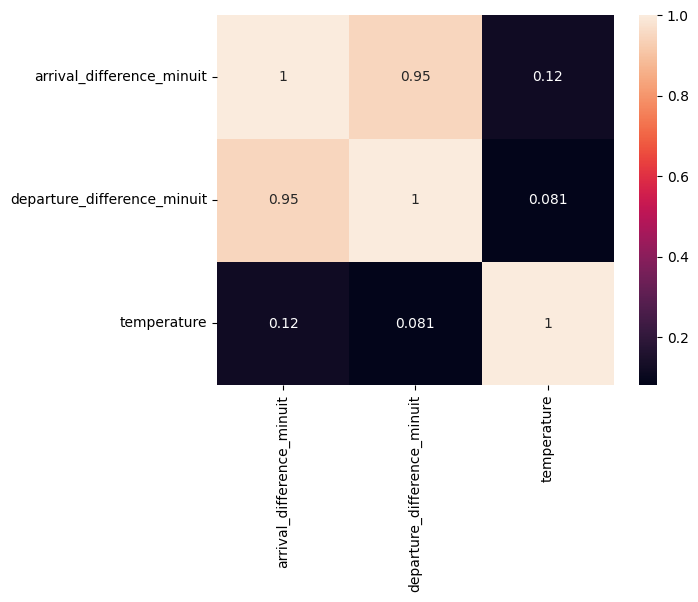

In [3]:
corr_matrix = df[['arrival_difference_minuit', 'departure_difference_minuit', 'temperature']].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

### Categorical & continues variable correlation

In [4]:
a = df['delay']
b = df['temperature']

In [5]:
stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.11386746309261948, pvalue=9.86464454544177e-07)

#### Pearson product-moment correlation

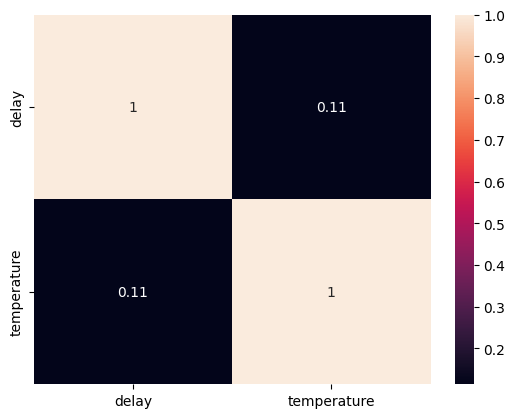

In [6]:
corr_matrix = np.corrcoef(a, b)
sn.heatmap(corr_matrix, annot=True, xticklabels=['delay', 'temperature'], yticklabels=['delay', 'temperature'])
plt.show()

# Conclusion

Of course, with more data we can conclude the experiment, but so far there isn't a correlation as of 06.2023.